## STAT 2600 Final Project by Ahmad Sai

 #### Necessary Libraries and Functions needed to create models and plots. 

In [36]:
import sklearn
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Read in the data from .csv file and display the first few rows. 

In [37]:
df = pd.read_csv("diabetes-dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


#### Before cleaning, the dataset has 9 columns and 2000 rows

In [38]:
df.shape

(2000, 9)

#### Cleaning dataset and remove anomolies

In [39]:
df = df[df.BloodPressure != 0]
df = df[df.Glucose != 0]
df = df[df.Insulin != 0]
df = df[df.SkinThickness != 0]
df = df[df.BMI != 0]

#### After cleaning, the dataset now only has 1035 rows remain

In [40]:
df.shape

(1035, 9)

#### Now I will group the entries in the dataset by age group (group 1: 20-30, group 2: 30-40, group 3: 40-50,...)

In [41]:
age_group1 = 0
age_group2 = 0
age_group3 = 0
age_group4 = 0
age_group5 = 0
age_group6 = 0
age_group7 = 0

for age, count in dict(df['Age'].value_counts()).items():
    if(age <= 30):
        age_group1 += count
    elif(age <= 40):
        age_group2 += count
    elif(age <= 50):
        age_group3 += count
    elif(age <= 60):
        age_group4 += count
    elif(age <= 70):
        age_group5 += count
    elif(age <= 80):
        age_group6 += count
    elif(age > 80):
        age_group7 += count 

#### Now I will graph the number of people in each age group

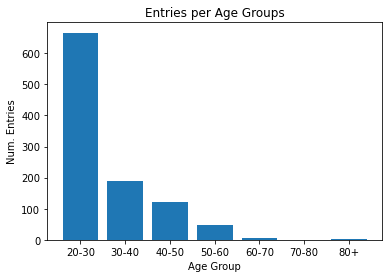

In [42]:
x_axis = ['20-30', '30-40', '40-50','50-60','60-70','70-80','80+']
y_axis = [age_group1, age_group2, age_group3, age_group4, age_group5, age_group6, age_group7]
plt.bar(x_axis, y_axis)
plt.title('Entries per Age Groups')
plt.ylabel('Num. Entries')
plt.xlabel('Age Group')
plt.show()

#### Looks like a large precentage of people in the dataset fall within the 20-30 age range. Now lets' see how many diabetics are in each age group

In [46]:
age_group_diabetes1 = 0
age_group_diabetes2 = 0
age_group_diabetes3 = 0
age_group_diabetes4 = 0
age_group_diabetes5 = 0
age_group_diabetes6 = 0
age_group_diabetes7 = 0


for row in range(len(df)):
    age = df.iloc[row]['Age']
    outcome = df.iloc[row]['Outcome']
    if(age <= 30 and outcome):
        age_group_diabetes1 += 1
    elif(age <= 40 and outcome):
        age_group_diabetes2 += 1
    elif(age <= 50 and outcome):
        age_group_diabetes3 += 1
    elif(age <= 60 and outcome):
        age_group_diabetes4 += 1
    elif(age <= 70 and outcome):
        age_group_diabetes5 += 1
    elif(age <= 80 and outcome):
        age_group_diabetes6 += 1
    elif(age > 80 and outcome):
        age_group_diabetes7 += 1

#### Create the plot

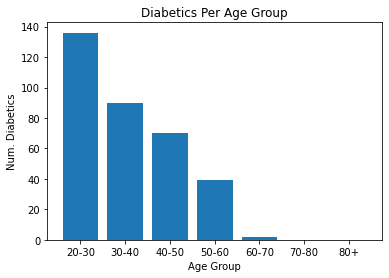

In [47]:
x_axis = ['20-30', '30-40', '40-50','50-60','60-70','70-80','80+']
y_axis = [age_group_diabetes1, age_group_diabetes2, age_group_diabetes3, age_group_diabetes4, age_group_diabetes5, age_group_diabetes6, age_group_diabetes7]
plt.bar(x_axis, y_axis)
plt.title('Diabetics Per Age Group')
plt.ylabel('Num. Diabetics')
plt.xlabel('Age Group')
plt.show()

#### Seems like most diabetics fall within the age range  20-30. This is to be expected as there are more entries for people who fall within this age range. Now let's see the percent of people in each age group that have diabetes.

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_13744\1691609417.py:4: RuntimeWarning: invalid value encountered in true_divide
  percents = np.divide(diabetics,ages)


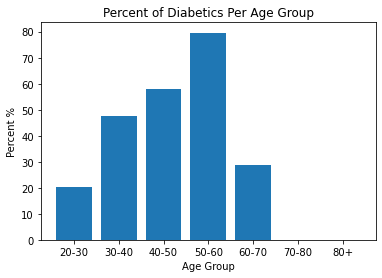

In [49]:
diabetics = np.asarray([age_group_diabetes1, age_group_diabetes2, age_group_diabetes3, age_group_diabetes4, age_group_diabetes5, age_group_diabetes6, age_group_diabetes7])
ages =  np.asarray([age_group1, age_group2, age_group3, age_group4, age_group5, age_group6, age_group7])

percents = np.divide(diabetics,ages)

x_axis = ['20-30', '30-40', '40-50','50-60','60-70','70-80','80+']
y_axis = percents*100
plt.bar(x_axis, y_axis)
plt.title('Percent of Diabetics Per Age Group')
plt.ylabel('Percent %')
plt.xlabel('Age Group')
plt.show()

#### Display the spread of data using the .std() function. Because all the values of the standard deviation of each column are high, it means that the data is less reliable.

In [5]:
df.std()

Pregnancies                   3.167531
Glucose                      30.653888
BloodPressure                12.336324
SkinThickness                10.558989
Insulin                     111.489069
BMI                           7.097899
DiabetesPedigreeFunction      0.332292
Age                          10.047212
Outcome                       0.468827
dtype: float64

#### Normalize data for consistency. Each column is normalized based on the largest value in that column such that every entry in the column falls in the range [0,1] 

In [7]:
for column in df.columns:
    df[column] = df[column]  / df[column].abs().max()

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0.000000,0.424242,0.745455,0.492063,0.168011,0.569300,0.096281,0.283951,0.0
3,0.000000,0.681818,0.618182,0.666667,0.336022,0.630402,0.150826,0.296296,1.0
4,0.058824,0.702020,0.563636,0.650794,0.645161,0.606557,0.221488,0.259259,0.0
5,0.000000,0.873737,0.709091,0.507937,0.356183,0.692996,0.478926,0.716049,0.0
8,0.117647,0.419192,0.590909,0.444444,0.088710,0.548435,0.259917,0.296296,0.0


#### Shuffle the data 100 times. Excessive, but done to avoid inequalities found in data when entries were first recorded, it also helps spread the data so that there isn't data disparity.

In [8]:
for i in range(100):
    df = df.sample(frac=1)
    
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1487,0.000000,0.681818,0.854545,0.730159,0.194892,0.605067,0.117355,0.320988,0.0
228,0.235294,0.994949,0.636364,0.619048,1.000000,0.546945,0.962397,0.382716,0.0
1700,0.411765,0.848485,0.800000,0.666667,0.431452,0.569300,0.325207,0.493827,1.0
165,0.352941,0.525253,0.672727,0.285714,0.209677,0.445604,0.298347,0.506173,1.0
414,0.000000,0.696970,0.545455,0.555556,0.224462,0.515648,0.220661,0.259259,1.0


#### Display the spread of data using the .std() function after shuffling. Because all the values of the standard deviation of each column are low, it means that the data is more reliable.

In [9]:
df.std()

Pregnancies                 0.186325
Glucose                     0.154818
BloodPressure               0.112148
SkinThickness               0.167603
Insulin                     0.149851
BMI                         0.105781
DiabetesPedigreeFunction    0.137311
Age                         0.124040
Outcome                     0.468827
dtype: float64

#### Split data into 80% for training set, and 20% for testing set. 

In [10]:
training_data, testing_data = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)

In [11]:
training_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
442,0.235294,0.590909,0.581818,0.428571,0.161290,0.494784,0.095041,0.296296,0.0
544,0.058824,0.444444,0.709091,0.460317,0.102151,0.476900,0.150826,0.358025,0.0
1685,0.058824,0.404040,0.672727,0.174603,0.080645,0.447094,0.217769,0.271605,0.0
1189,0.117647,0.878788,0.800000,0.587302,0.161290,0.663189,0.266942,0.296296,1.0
445,0.000000,0.909091,0.709091,1.000000,0.018817,0.885246,1.000000,0.308642,1.0
...,...,...,...,...,...,...,...,...,...
777,0.000000,0.691919,0.618182,0.222222,0.198925,0.369598,0.059091,0.259259,0.0
127,0.058824,0.595960,0.527273,0.571429,0.126344,0.496274,0.107851,0.283951,0.0
1190,0.117647,0.535354,0.509091,0.428571,0.221774,0.432191,0.176033,0.271605,0.0
1120,0.529412,0.732323,0.727273,0.730159,0.174731,0.564829,0.263223,0.493827,1.0


In [12]:
testing_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1278,0.000000,0.818182,0.690909,0.888889,0.134409,0.792846,0.313636,0.308642,1.0
313,0.176471,0.570707,0.454545,0.158730,0.114247,0.439642,0.258678,0.308642,0.0
1582,0.000000,0.686869,0.672727,0.777778,0.295699,0.299553,0.338843,0.543210,1.0
1892,0.294118,0.702020,0.581818,0.555556,0.188172,0.426230,0.169835,0.320988,0.0
1549,0.117647,0.419192,0.590909,0.444444,0.088710,0.548435,0.259917,0.296296,0.0
...,...,...,...,...,...,...,...,...,...
1193,0.000000,0.636364,0.781818,0.428571,0.161290,0.408346,0.212810,0.259259,0.0
1733,0.117647,0.792929,0.672727,0.555556,0.591398,0.587183,0.055372,0.370370,0.0
421,0.117647,0.474747,0.618182,0.285714,0.102151,0.387481,0.231818,0.259259,0.0
956,0.058824,0.702020,0.563636,0.650794,0.645161,0.606557,0.221488,0.259259,0.0


#### Set the training data to be all the input columns of the dataset, columns 1 to 8, and the training dataset to be the last column (9)

In [13]:
x_train = training_data[training_data.columns[:-1]]
y_train = training_data[training_data.columns[-1]]

#### Set the testing data to be all the input columns of the dataset, columns 1 to 8, and the testing dataset to be the last column (9)

In [14]:
x_test = testing_data[testing_data.columns[:-1]]
y_test = testing_data[testing_data.columns[-1]]

#### Build Logistic Regression Model, train the model and show the accuracy of it. This will be the default model as it is built on all the input columns.

In [15]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)


model_accuracy = model.score(x_test, y_test) * 100.0
print("Accuracy: %.2f%%" % model_accuracy) # accuracy of the model

Accuracy: 73.91%


#### The default model seems to have a 73.91% accuracy rate at predicting whether a person has diabetes or not. This is quite accurate but let's see if we can do better. From researching the leading causes of diabetes I will create a model that only takes in attributes that have the most impact on determining whether the person has diabetes or not. Based on my findings from doing some research, my new modified model will include the attributes: 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'.

In [16]:
x_train_2 = training_data.iloc[:, [1,2,4,5,6,7]]
y_train_2 = training_data[training_data.columns[-1]]

x_test_2 = testing_data.iloc[:, [1,2,4,5,6,7]]
y_test_2 = testing_data[testing_data.columns[-1]]

#### Build the new logistic regression model based on the research done, train it and show its accuracy. This will be the modified model as it is built on input columns that seem to have the most impact on a person's diabetic nature.

In [17]:
modified_model = LogisticRegression()
modified_model.fit(x_train_2, y_train_2)

modified_model_accuracy = modified_model.score(x_test_2, y_test_2) * 100.0
print("Accuracy: %.2f%%" % modified_model_accuracy) # accuracy of the model

Accuracy: 72.95%


#### The modified model seems to have 72.95% accuracy, which unfortunately is worse than before. It seems like the model performs worse with less input. Now, let us see if we can build a different kind of model that is more accurate than logistic regression. The first model I will build will be Xgboost. 

In [18]:
model_xg = XGBClassifier()
model_xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [19]:
# make predictions for test data
y_pred = model_xg.predict(x_test)
predictions = [round(value) for value in y_pred]

model_xg_accuracy = accuracy_score(y_test, predictions) * 100.0
print("Accuracy: %.2f%%" % model_xg_accuracy)

Accuracy: 95.65%


#### Incredible! The Xgboost model has a prediction accuracy of 95.65%. Now let's how Xgboost performs compared to a Decision Tree model. 

In [20]:
model_dct = DecisionTreeClassifier()
model_dct.fit(x_train, y_train)
model_dct_accuracy = model_dct.score(x_test, y_test) * 100.0


print("Accuracy: %.2f%%" % (model_dct_accuracy)) # accuracy of the model

Accuracy: 95.17%


#### The Decision Tree model has a prediction accuracy of 95.17%, which is fantastic. The Xgboost model still outperformed the Decision Tree model, but both are incredibly accurate. Now let's compare these models to a new modeling called Support Vector Machine (SVM)

In [21]:
model_svm=LinearSVC()
model_svm.fit(x_train, y_train)
model_svm_accuracy = model_svm.score(x_test, y_test)* 100.0


print("Accuracy: %.2f%%" % (model_svm_accuracy)) # accuracy of the model

Accuracy: 76.33%


#### Looks like the Support Vector Machine (SVM) model has a 76.33% accuracy for predicting whether a person is diabetic or not. Now lets visually compare the accuracies of the model by using a bar plot.

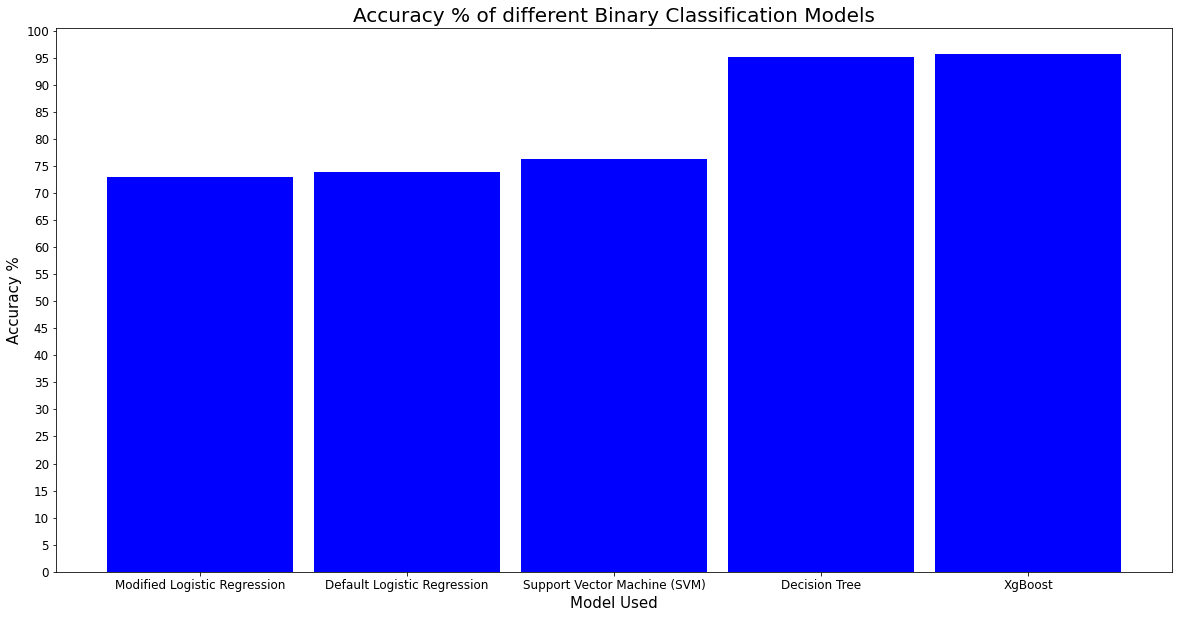

In [22]:
model_accuracies = { 'Modified Logistic Regression': modified_model_accuracy, 'Default Logistic Regression': model_accuracy, 'Support Vector Machine (SVM)': model_svm_accuracy, 'Decision Tree': model_dct_accuracy, 'XgBoost':model_xg_accuracy}

model_used = list(model_accuracies.keys())
accuracy_attained = list(model_accuracies.values())
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(model_used, accuracy_attained,color ='blue',
        width = 0.9)
plt.xticks(fontsize=12)
plt.yticks(np.arange(0, 105, 5), fontsize=12)

plt.xlabel("Model Used", fontsize=15)
plt.ylabel("Accuracy %", fontsize=15)
plt.title("Accuracy % of different Binary Classification Models", fontsize=20)
plt.show()

#### As we can clearly see, Xgboost and Decision Tree were the most accurate, Support Vector Machine (SVM) coming in next, and the Logistic Regression models coming in at the end